In [10]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:
import requests
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

response = requests.get(URL)
data = pd.read_csv(io.StringIO(response.text))


In [5]:
data.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


<function matplotlib.pyplot.show(close=None, block=None)>

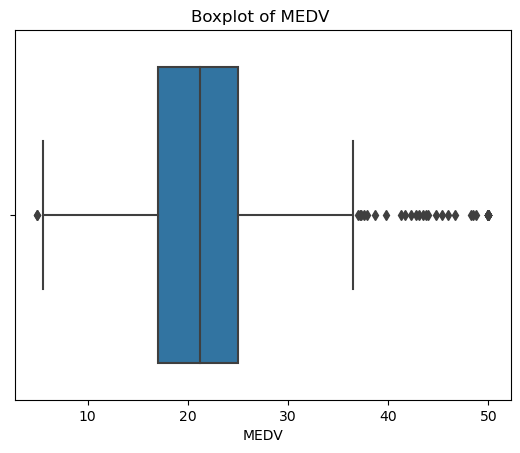

In [24]:
## insert code
ax = sns.boxplot(x='MEDV', data=data)
plt.title('Boxplot of MEDV ')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

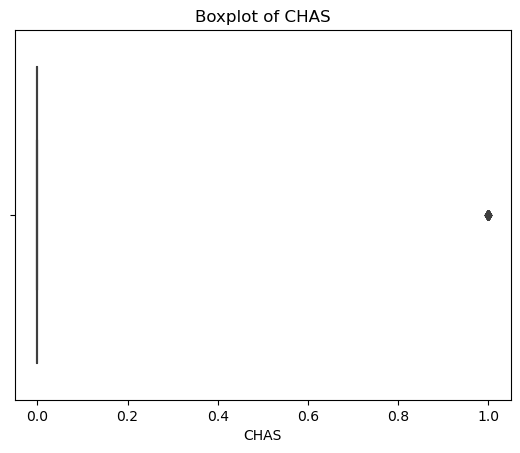

In [23]:
## insert code
ax = sns.boxplot(x='CHAS', data=data)
plt.title('Boxplot of CHAS')
plt.show

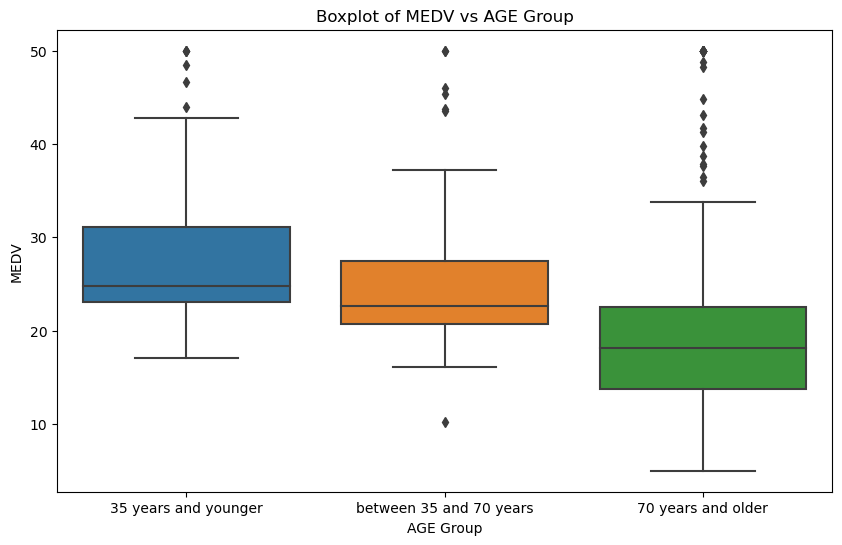

In [22]:
bins = [0, 35, 70, float('inf')]
labels = ['35 years and younger', 'between 35 and 70 years', '70 years and older']
data['AGE_Group'] = pd.cut(data['AGE'], bins=bins, labels=labels, right=False)

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=data)
plt.title('Boxplot of MEDV vs AGE Group')
plt.xlabel('AGE Group')
plt.ylabel('MEDV')
plt.show()

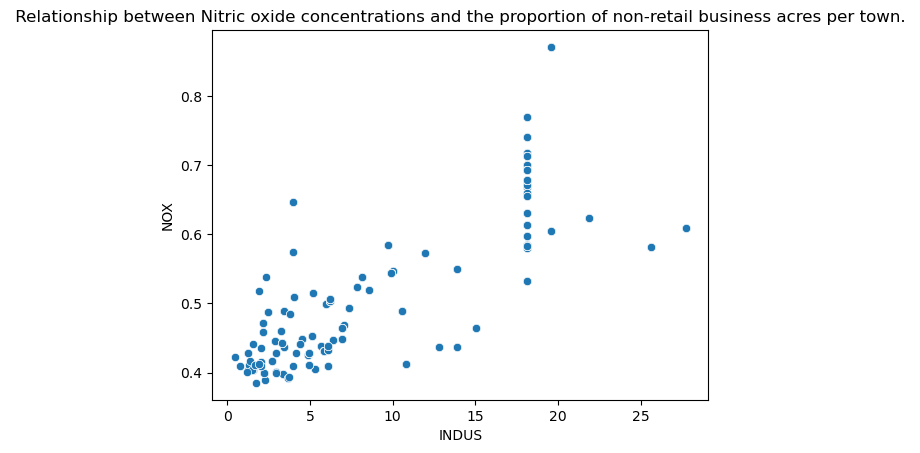

In [30]:
ax = sns.scatterplot(x='INDUS', y='NOX', data=data)
plt.title(" Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. ")
plt.show()


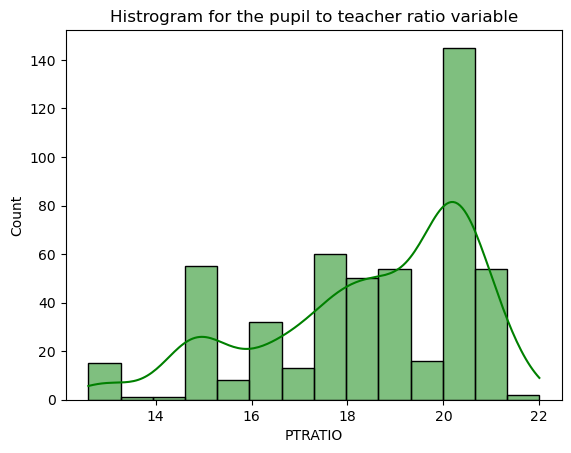

In [35]:
ax = sns.histplot(data['PTRATIO'], kde = True,color='green')
plt.title("Histrogram for the pupil to teacher ratio variable")
plt.show()

In [42]:
from scipy.stats import ttest_ind
scipy.stats.ttest_ind(data[data['CHAS'] == 0]['MEDV'],
                   data[data['CHAS'] == 1]['MEDV'], equal_var = False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

Result:
as p value is less then 0.05, we reject the null hypothesis that is suggesting evidence of significant difference in median values

In [57]:
from scipy.stats import f_oneway

# Assuming 'data' is your DataFrame with 'MEDV' and 'AGE' columns
groups = [data[data['AGE'] == age_group]['MEDV'] for age_group in data['AGE'].unique()]

# Perform ANOVA test
f_statistic, p_value = f_oneway(*groups)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 0.9840091646131573, P-Value: 0.5539698276810093


result: as p value is greater than 0.05, we failed to reject the null hypothesis that There is no significant difference in the median values of houses for each proportion of owner-occupied units built prior to 1940.

In [58]:
scipy.stats.pearsonr(data['NOX'], data['INDUS'])

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061241167e-98)

result: as p value is less than 0.05, we reject the null hypothesis that there is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [60]:
## insert code here
X = data['DIS']
y = data['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           1.21e-08
Time:                        02:03:58   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

result: as p value is less than 0.05, there is correlation between  weighted distance  to the five Boston employment centres and the median value of owner occupied homes